## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.



In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os
os.chdir('../')
print(os.getcwd())
from Line import Line
from Camera import Camera
from LaneFinder import LaneFinder

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#%matplotlib qt
%matplotlib inline
np.set_printoptions(threshold=np.inf)

/Users/johnfodero/Projects/Udacity SDC/Term1/CarND-Advanced-Lane-Lines


# 1. Calibrate Camera 

In [5]:
images = glob.glob('../camera_cal/calibration*.jpg')
camera = Camera()
camera.calibrate(images)
test_img = plt.imread(images[0])
undst = camera.undistort_image(test_img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undst)
ax2.set_title('Undistorted Image', fontsize=30)


IndexError: list index out of range

# 2. Perspective Transform

Text(0.5, 1.0, 'Transformed Image')

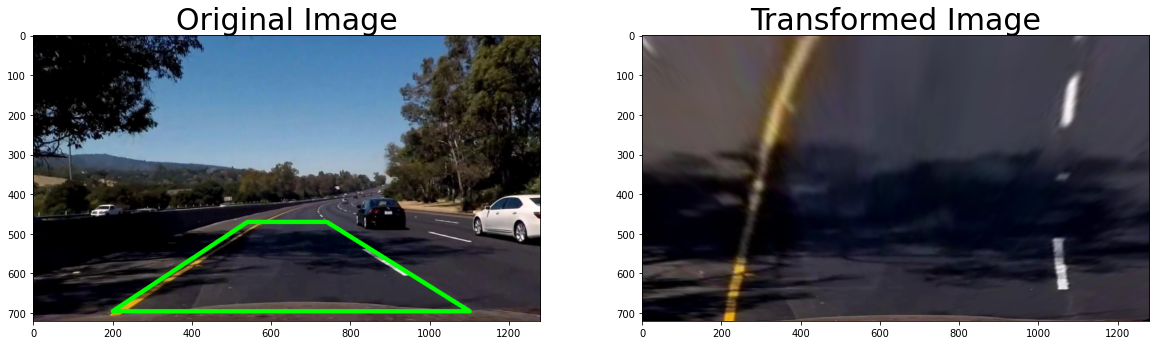

In [178]:
fname = '../test_images/shadow1.jpg'
img = plt.imread(fname)
cal_img = camera.undistort_image(img)
outimg = camera.calibrate_perspective(cal_img)
tximg = camera.transform_image(cal_img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(outimg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(tximg)
ax2.set_title('Transformed Image', fontsize=30)

# 3. Tune the filtered image

In [6]:
cal_images = glob.glob('camera_cal/calibration*.jpg')
lf = LaneFinder(cal_images)
test_image = plt.imread('test_images/shadow1.jpg')

In [7]:
def plot_images(s_thresh_min, s_thresh_max, sx_thresh_min, sx_thresh_max):
    # Plot the result
    result, s, sx = lf.camera.pipeline(test_image, s_thresh=(s_thresh_min, s_thresh_max), sx_thresh=(sx_thresh_min, sx_thresh_max))
    #result, s, sx = lf.camera.pipeline(test_image)
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(s)
    ax1.set_title('Color Filter', fontsize=40)

    ax2.imshow(test_image)
    ax2.set_title('Input', fontsize=40)
    
    ax3.imshow(sx)
    ax3.set_title('sx', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

s_thresh_min = widgets.IntSlider(min=0,max=255,step=1,value=90, continuous_update=False, description='s_min')
s_thresh_max = widgets.IntSlider(min=0,max=255,step=1,value=255, continuous_update=False, description='s_max')
sx_thresh_min = widgets.IntSlider(min=0,max=255,step=1,value=20, continuous_update=False, description='sx_min')
sx_thresh_max = widgets.IntSlider(min=0,max=255,step=1,value=100, continuous_update=False, description='sx_max')
ui = widgets.HBox([s_thresh_min, s_thresh_max, sx_thresh_min, sx_thresh_max])

out = widgets.interactive_output(plot_images, {'s_thresh_min': s_thresh_min, 's_thresh_max': s_thresh_max, 'sx_thresh_min': sx_thresh_min, 'sx_thresh_max': sx_thresh_max})

display(ui, out)  

Output()

In [4]:
# Test camera pipeline
result, s, sx = camera.pipeline(tximg)
binary_img = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
plt.imshow(binary_img)
print(binary_img.shape)

NameError: name 'camera' is not defined

# 5. Detect Lane Pixels & Find Line

starting lane find


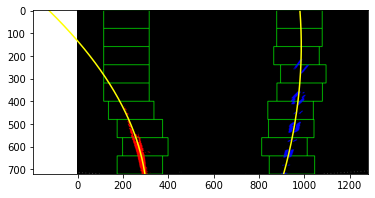

In [61]:
def start_lane_find(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        
        good_left_inds = ((nonzerox < win_xleft_high) & (nonzerox > win_xleft_low) 
                                  & (nonzeroy < win_y_high) & (nonzeroy > win_y_low)).nonzero()[0]
        good_right_inds = ((nonzerox < win_xright_high) & (nonzerox > win_xright_low) 
                                  & (nonzeroy < win_y_high) & (nonzeroy > win_y_low)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if good_left_inds.shape[0] > minpix:
            histogram = np.sum(binary_warped[(nwindows-(window+1))*window_height:(nwindows-window)*window_height, win_xleft_low:win_xleft_high], axis=0)
            leftx_current = np.argmax(histogram) + win_xleft_low
        if good_right_inds.shape[0] > minpix:
            histogram = np.sum(binary_warped[(nwindows-(window+1))*window_height:(nwindows-window)*window_height, win_xright_low:win_xright_high], axis=0)
            rightx_current = np.argmax(histogram) + win_xright_low

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError as e:
        # Avoids an error if the above is not implemented fully
        print(e)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    # Color detected pixels
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    
    plt.plot(left_lane.bestx, ploty, color='yellow')
    plt.plot(right_lane.bestx, ploty, color='yellow')
    
    return out_img

def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###

    # USING PREV not AVG
    left_fit = left_lane.current_fit
    right_fit = right_lane.current_fit
    left_fit_old = left_fit[0]*nonzeroy**2 + left_fit[1]*nonzeroy + left_fit[2]
    right_fit_old = right_fit[0]*nonzeroy**2 + right_fit[1]*nonzeroy + right_fit[2]
    left_lane_inds = ((nonzerox < left_fit_old+margin) & (nonzerox > left_fit_old-margin)).nonzero()[0]
    right_lane_inds = ((nonzerox < right_fit_old+margin) & (nonzerox > right_fit_old-margin)).nonzero()[0]
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    
    return result

def fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, deg=2)
    right_fit = np.polyfit(righty, rightx, deg=2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
        left_lane.detected = False
        right_lane.detected = False
    else:
        left_lane.detected = True
        right_lane.detected = True
        left_lane.update_fit(left_fitx, left_fit)
        right_lane.update_fit(right_fitx, right_fit)
        
    return left_fitx, right_fitx, ploty

def get_lines(img):
    binary_warped = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Find our lane pixels first
    if not left_lane.detected or not right_lane.detected:
        print('starting lane find')
        out_img = start_lane_find(binary_warped)
    else:
        print('using line margin finding')
        out_img = search_around_poly(binary_warped)
    
    return out_img

#binary_warped = plt.imread('warped-example.jpg')
left_lane = Line(binary_img.shape)
right_lane = Line(binary_img.shape)

out_img = get_lines(binary_img)

plt.imshow(out_img)

using line margin finding


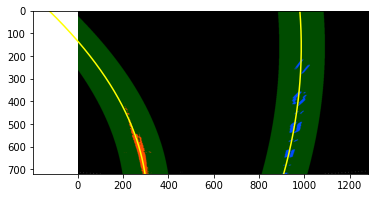

In [62]:
out_img = get_lines(binary_img)

plt.imshow(out_img)

# Flow
- Create 2 lane line objects
- Fit image w/ bucketing technique
- store polynomials to avg
- switch to poly match technique
- if not found
- 

### Helper functions
- Search around poly
    - Take 'line object
    - Use prev or avg, draw margin, find points in that area, attempt to get fit for poly
    - if no points found, return w/ failure
    - if points found,
        - Draw line
        - Draw margin
        - update line object with all new data

- Start lane find
    - Does not use average, finds points from left/right half of image
    - Draw rectangles, find points, attempt to fit poly
    - if no points found, return with failure
    - if points found
        - draw line
        - update line object

each helper function 

# 6. Determine Curvature & Vehicle Position

In [63]:
def get_vehicle_lane_position(img, left_lane, right_lane, px_to_m=3.7/700):
    center = left_lane.bestx[-1] + ((right_lane.bestx[-1] - left_lane.bestx[-1])/2)
    veh_pos = img.shape[1]/2
    return px_to_m*(veh_pos - center)



print('Vehicle center: ', get_vehicle_lane_position(out_img, left_lane, right_lane))
print('Left radius:', left_lane.update_radius(), 'm')
print('Right radisu:', right_lane.update_radius(), 'm')

Vehicle center:  0.19848488601976608
Left radius: 2125.0 m
Right radisu: 3062.0 m


# 7. Display (unwarp) curves to image

(1, 1, 1440, 2)
(720, 1280, 3)


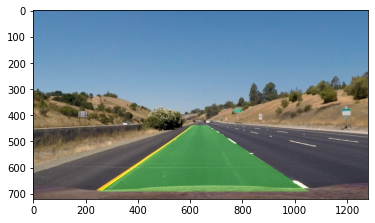

In [64]:

    
    
result = camera.display_lane(binary_img, img)
plt.imshow(result)

# 8. Output Image, Curvature, and Position

In [ ]:
# plt.imshow()